Solve equation of fluid motino in a pressure driven pip flow with periodic boundary condition on both end. If started with an intial uniform profile, the Hagen-Poisenuille parabula profile will develop over time.


Scenario:
 infinitely long tube where it is periodic, the leaving fluid, left from the pioe will reeters the entering wall

Steps

0. Initamtoze the u-solution filed with ones expect for the top and bottom boundary
1. Compute convectino by periodic central differnce
2. Compute diffusion by periodic five-point stencil
3. Advance to next step by Euler step
4. Enfore the wall boundary condition by setting the u velocity at the top and the bottom boundary to zero
5. Repeat from (1.) until a steady state is reached.

NO pressure correction equation has to be solved since the pressure gradient is prescibe constant through the domain


In [7]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
N_POINTS = 11
KINEMATIC_VISCOUSITY = 0.01
TIME_STEP_LENGTH = 0.2
N_TIME_STEPS = 100

PRESSURE_GRADIENT = np.array([-1.0, 0.0])

In [3]:
element_length = 1.0 / (N_POINTS - 1)
x_range = np.linspace(0, 1, N_POINTS)
y_range = np.linspace(0, 1, N_POINTS)
# make a meshgrid to represent the points in the domain
coordinates_x, coordinates_y = np.meshgrid(x_range, y_range)



In [4]:
# Return central difference, but make it periodic using np.roll to % the result, operation is partial u on x
# This is the first step
def central_different_x_periodic(field):
    diff = (
        (
            np.roll(field, shift = 1, axis = 1)
            -
            np.roll(field, shift = -1, axis = 1)
        ) / (2 * element_length)
    )
    return diff

def laplace_periodic(field):
    diff = (
        np.roll(field, shift = 1, axis = 1)
        +
        np.roll(field, shift = -1, axis = 1)
        +
        np.roll(field, shift = 1, axis = 0)
        +
        np.roll(field, shift = -1, axis = 0)
        -
        4 * field
    ) / (element_length ** 2)
    return diff

  0%|          | 0/100 [00:00<?, ?it/s]/var/folders/bf/xd2nsc5x5qgdz2fsmfpd2dtw0000gn/T/ipykernel_74598/1342440882.py:32: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contourf(coordinates_x, coordinates_y, velocity_x_prev, level = 50)


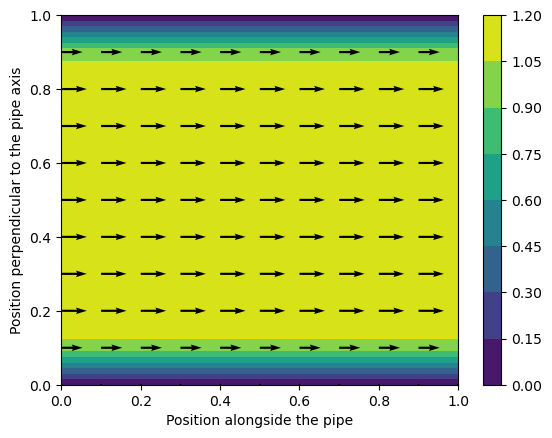

  1%|          | 1/100 [00:00<00:15,  6.49it/s]

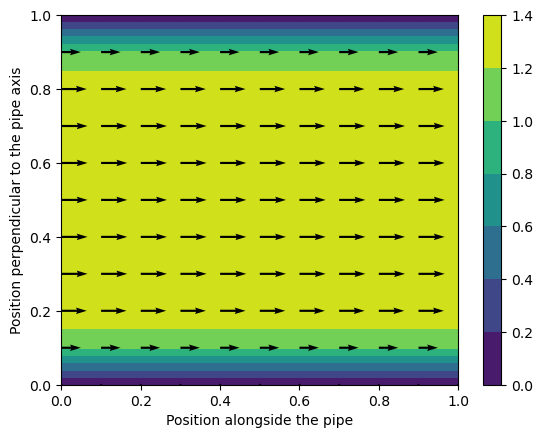

  2%|▏         | 2/100 [00:00<00:13,  7.47it/s]

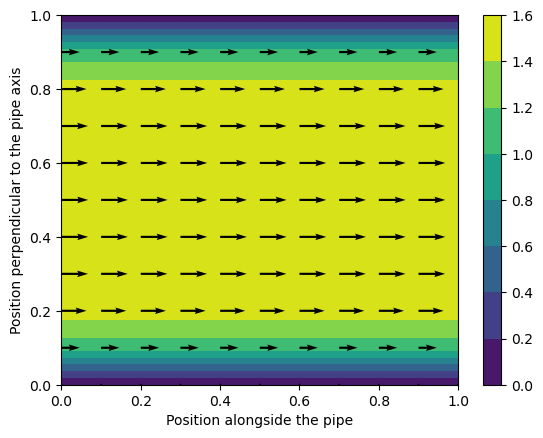

  3%|▎         | 3/100 [00:00<00:13,  7.02it/s]

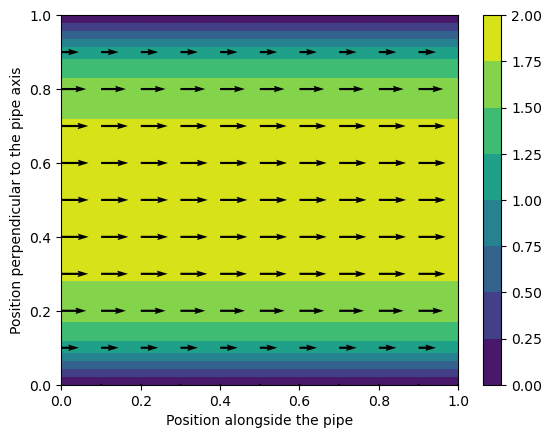

  4%|▍         | 4/100 [00:00<00:13,  7.34it/s]

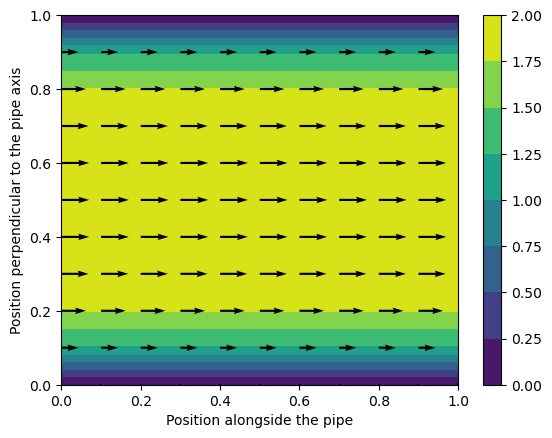

  5%|▌         | 5/100 [00:00<00:12,  7.52it/s]

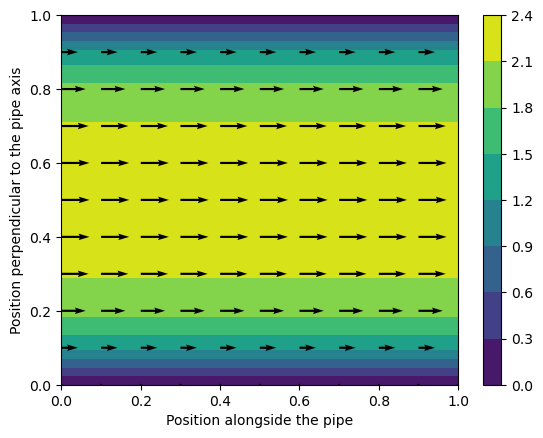

  6%|▌         | 6/100 [00:00<00:12,  7.52it/s]

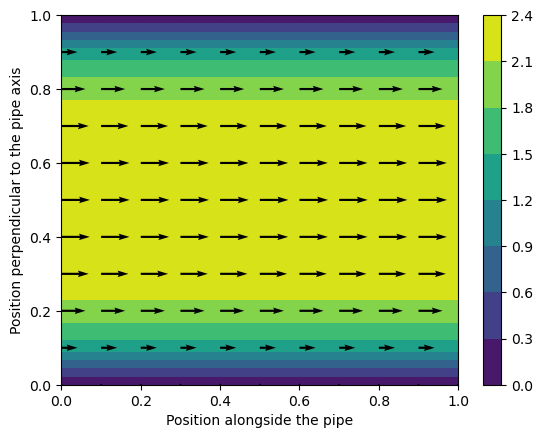

  7%|▋         | 7/100 [00:00<00:12,  7.63it/s]

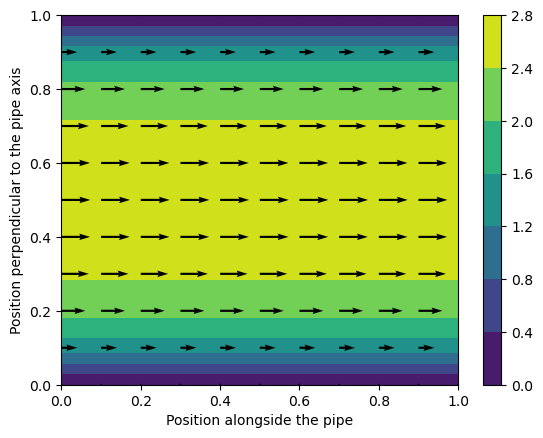

  8%|▊         | 8/100 [00:01<00:11,  7.76it/s]

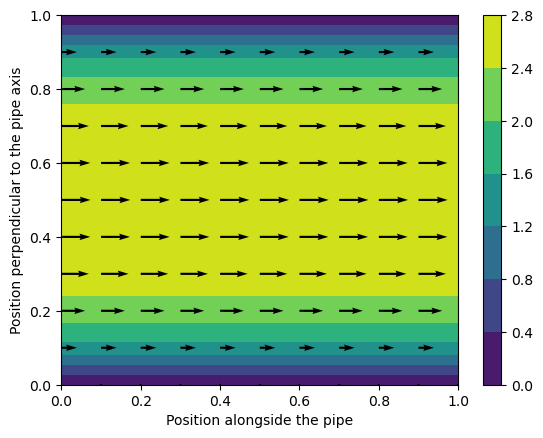

  9%|▉         | 9/100 [00:01<00:11,  7.94it/s]

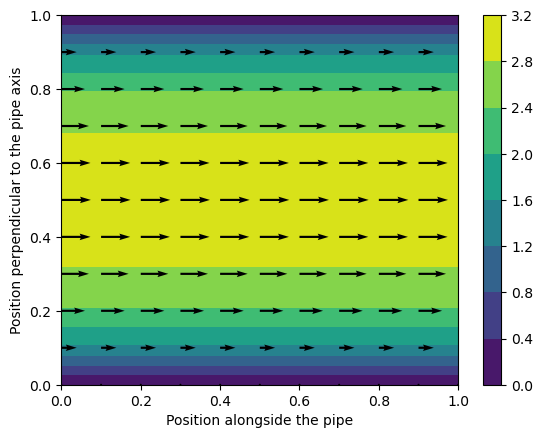

 10%|█         | 10/100 [00:01<00:11,  7.92it/s]

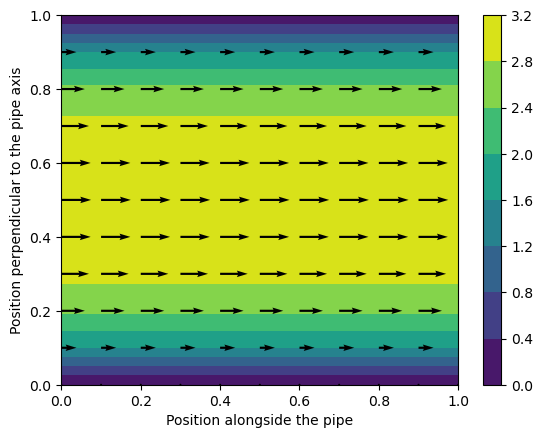

 11%|█         | 11/100 [00:01<00:11,  7.91it/s]

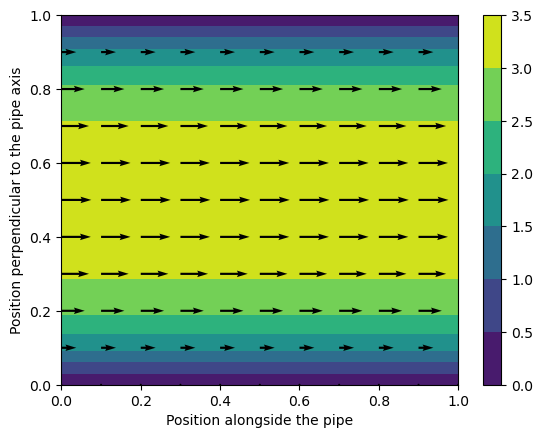

 12%|█▏        | 12/100 [00:01<00:11,  7.98it/s]

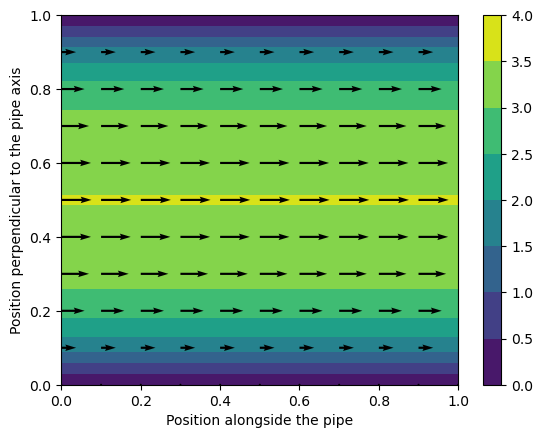

 13%|█▎        | 13/100 [00:01<00:10,  8.03it/s]

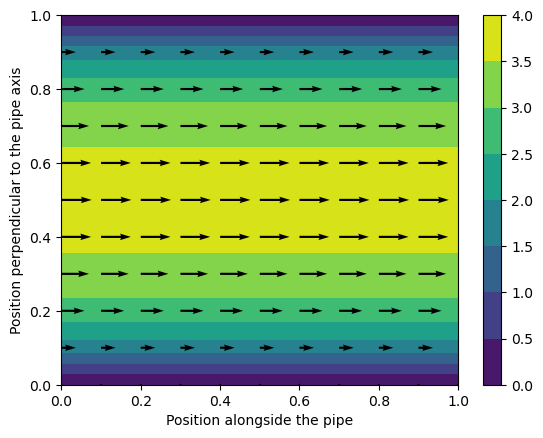

 14%|█▍        | 14/100 [00:01<00:10,  7.99it/s]

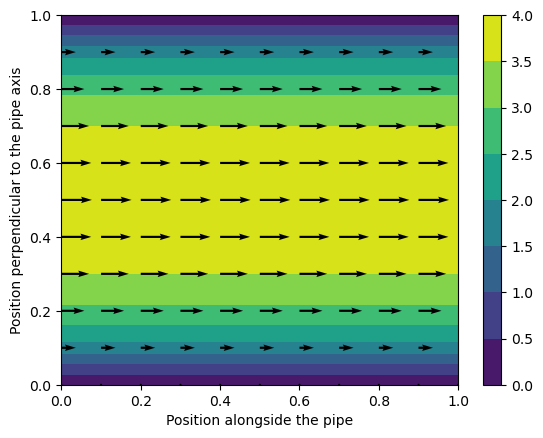

 15%|█▌        | 15/100 [00:01<00:10,  8.03it/s]

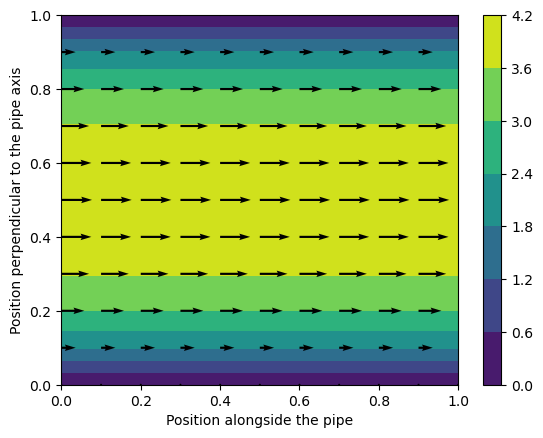

 16%|█▌        | 16/100 [00:02<00:11,  7.30it/s]

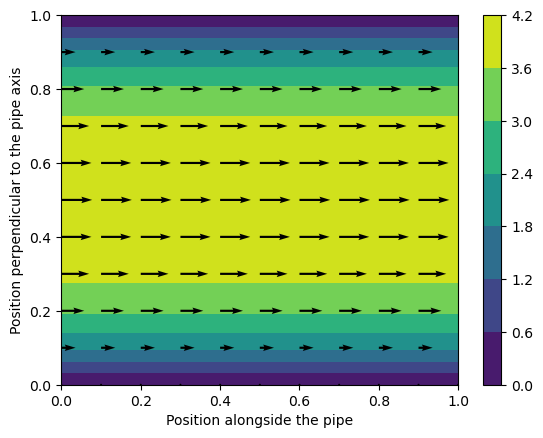

 17%|█▋        | 17/100 [00:02<00:11,  7.51it/s]

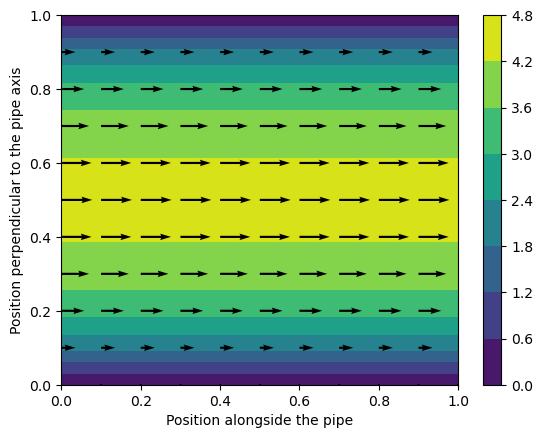

 18%|█▊        | 18/100 [00:02<00:11,  7.42it/s]

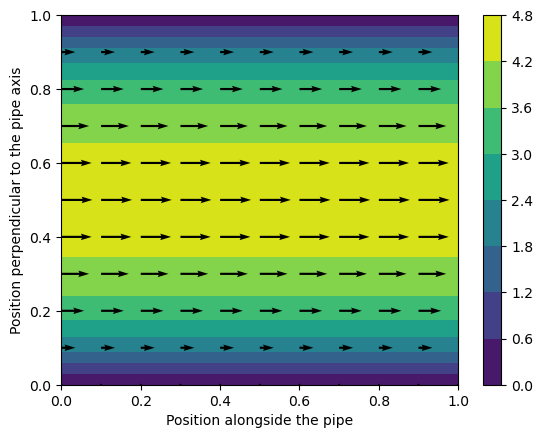

 19%|█▉        | 19/100 [00:02<00:10,  7.59it/s]

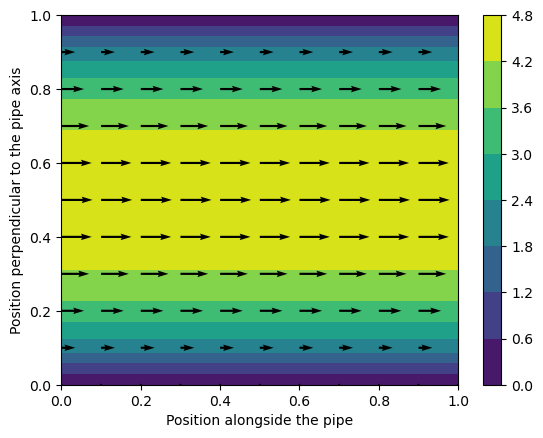

 20%|██        | 20/100 [00:02<00:10,  7.67it/s]

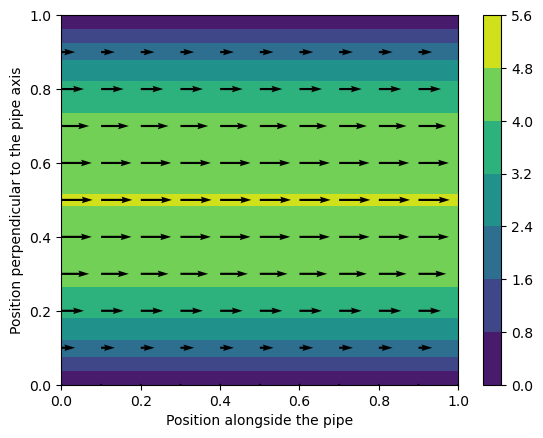

 21%|██        | 21/100 [00:02<00:10,  7.61it/s]

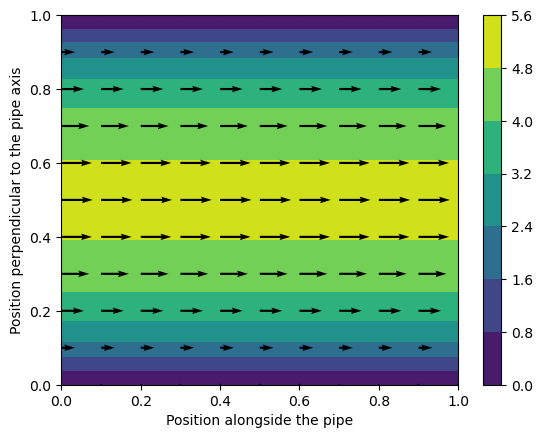

 22%|██▏       | 22/100 [00:02<00:10,  7.74it/s]

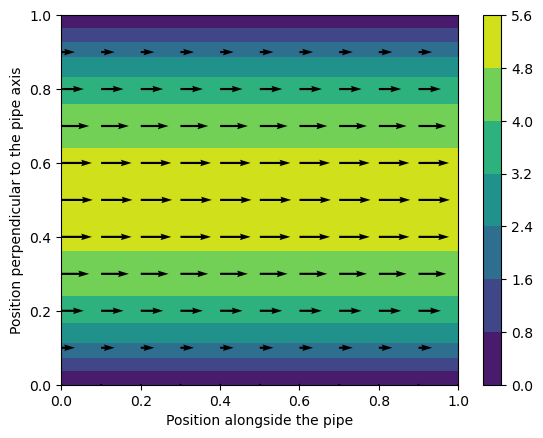

 23%|██▎       | 23/100 [00:02<00:09,  7.84it/s]

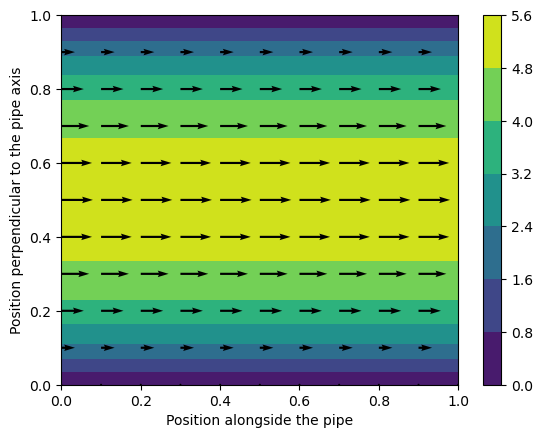

 24%|██▍       | 24/100 [00:03<00:09,  7.68it/s]

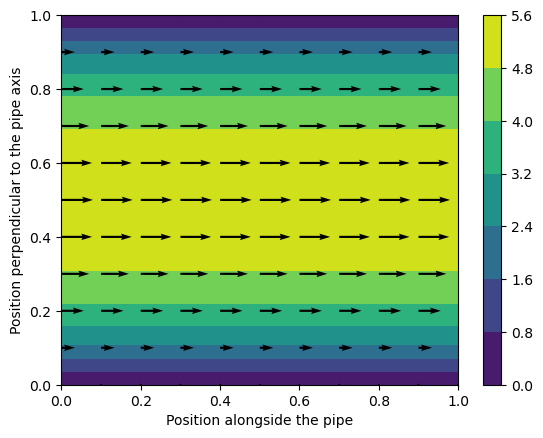

 25%|██▌       | 25/100 [00:03<00:09,  7.81it/s]

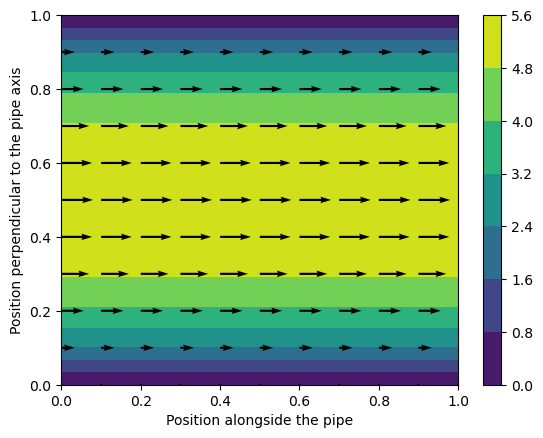

 26%|██▌       | 26/100 [00:03<00:09,  7.92it/s]

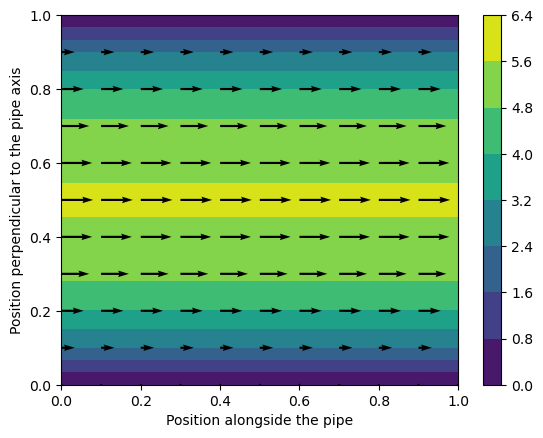

 27%|██▋       | 27/100 [00:03<00:09,  7.64it/s]

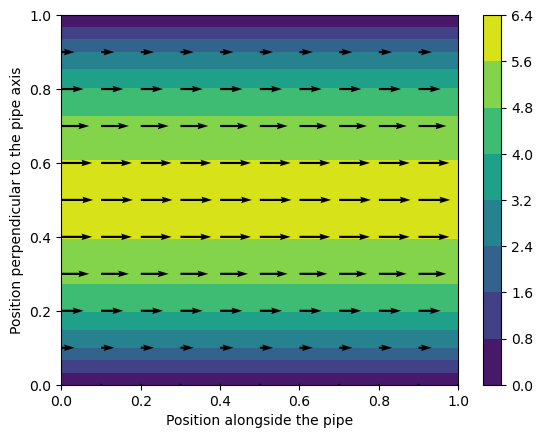

 28%|██▊       | 28/100 [00:03<00:09,  7.73it/s]

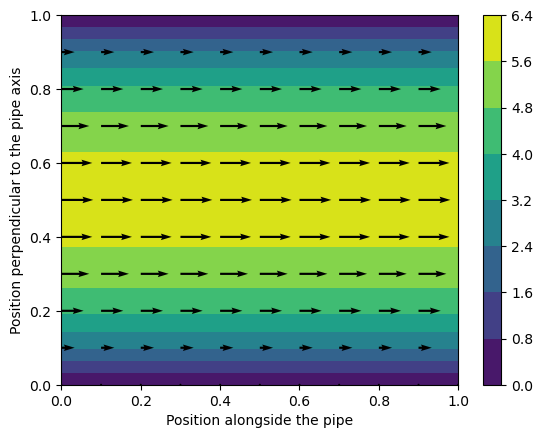

 29%|██▉       | 29/100 [00:03<00:09,  7.75it/s]

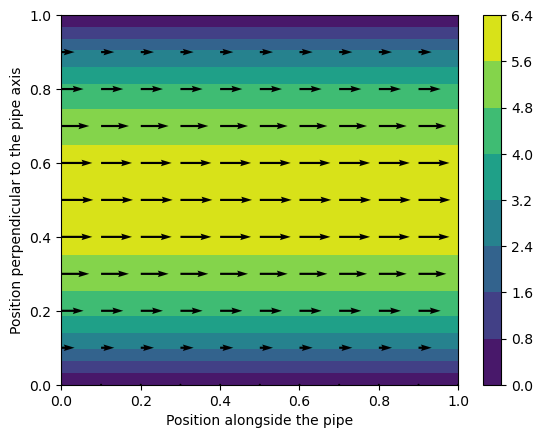

 30%|███       | 30/100 [00:03<00:09,  7.11it/s]

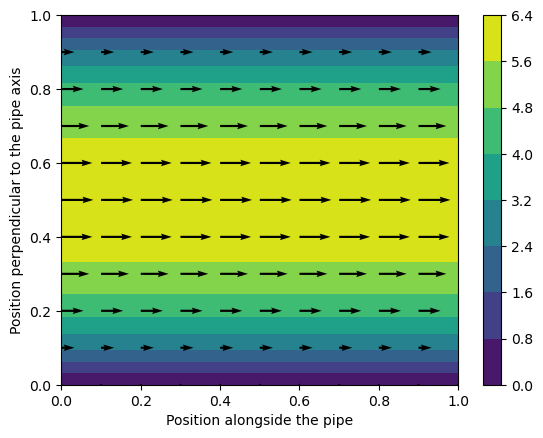

 31%|███       | 31/100 [00:04<00:09,  7.26it/s]

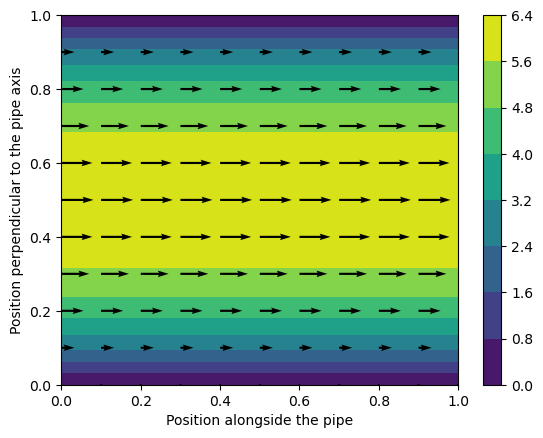

 32%|███▏      | 32/100 [00:04<00:09,  7.24it/s]

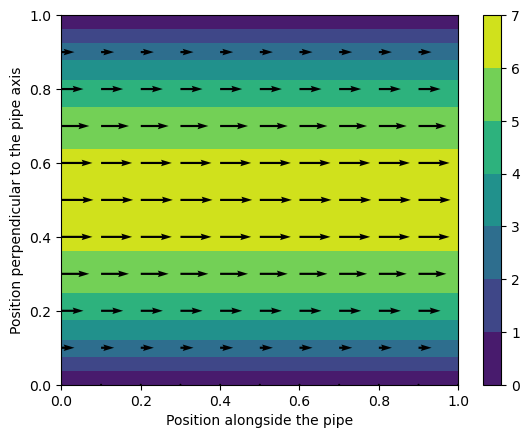

 33%|███▎      | 33/100 [00:04<00:08,  7.45it/s]

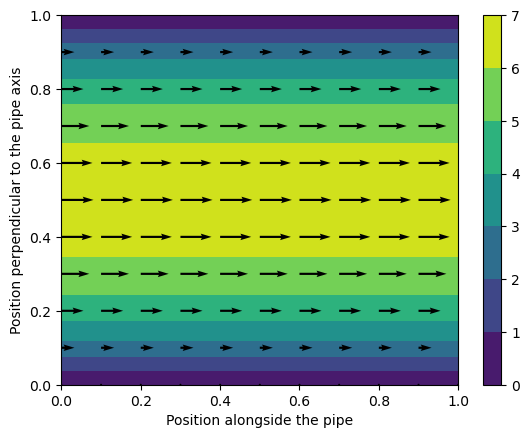

 34%|███▍      | 34/100 [00:04<00:08,  7.67it/s]

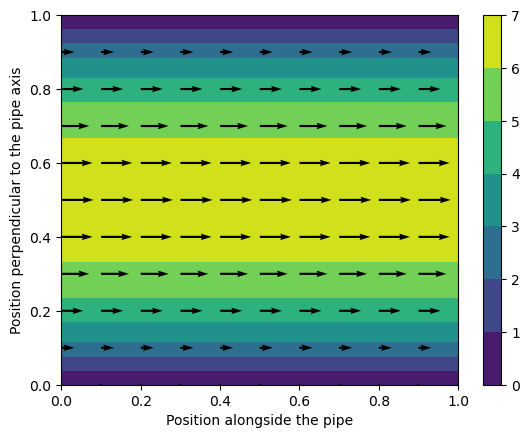

 35%|███▌      | 35/100 [00:04<00:08,  7.81it/s]

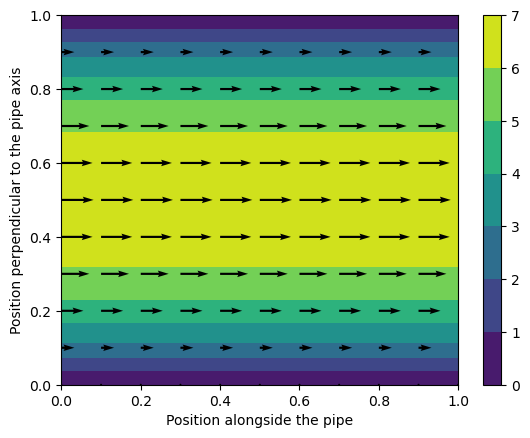

 36%|███▌      | 36/100 [00:04<00:08,  7.89it/s]

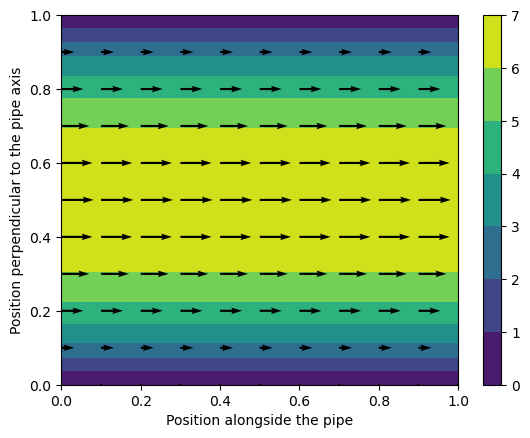

 37%|███▋      | 37/100 [00:04<00:08,  7.81it/s]

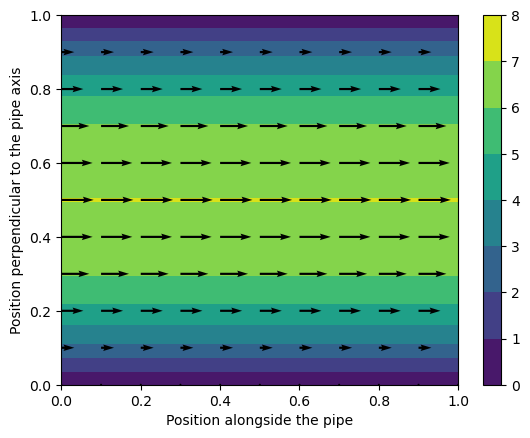

 38%|███▊      | 38/100 [00:04<00:07,  7.86it/s]

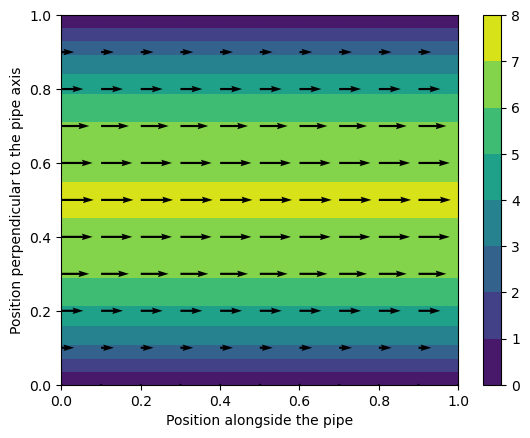

 39%|███▉      | 39/100 [00:05<00:07,  7.93it/s]

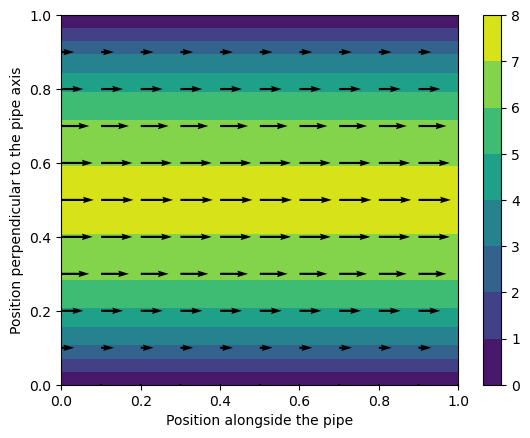

 40%|████      | 40/100 [00:05<00:07,  7.89it/s]

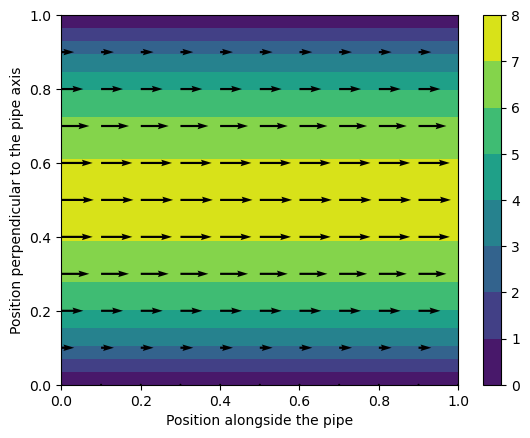

 41%|████      | 41/100 [00:05<00:07,  7.93it/s]

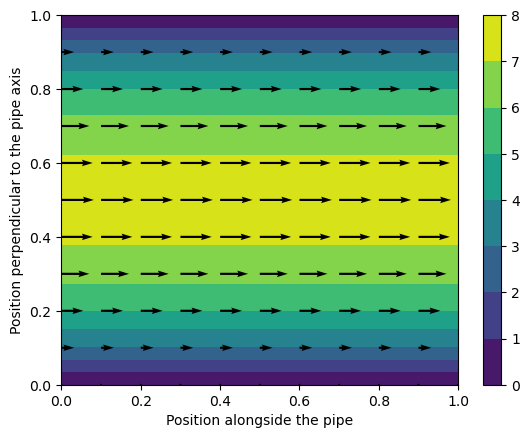

 42%|████▏     | 42/100 [00:05<00:07,  7.92it/s]

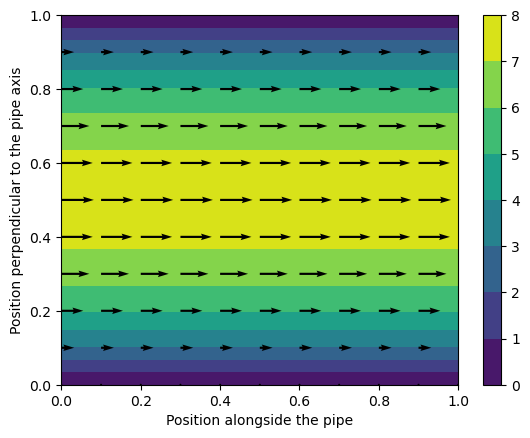

 43%|████▎     | 43/100 [00:05<00:07,  7.95it/s]

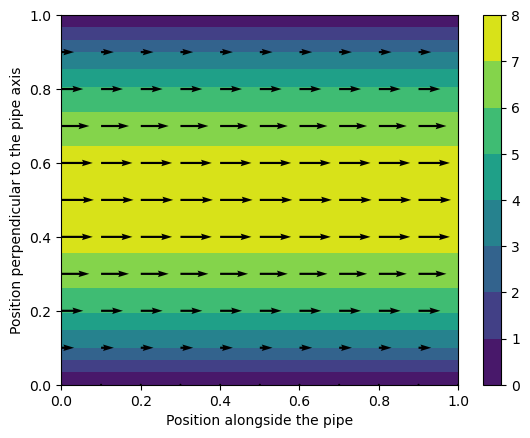

 44%|████▍     | 44/100 [00:05<00:07,  7.26it/s]

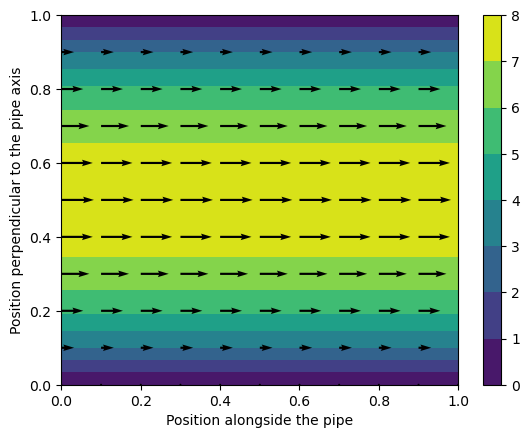

 45%|████▌     | 45/100 [00:05<00:07,  7.45it/s]

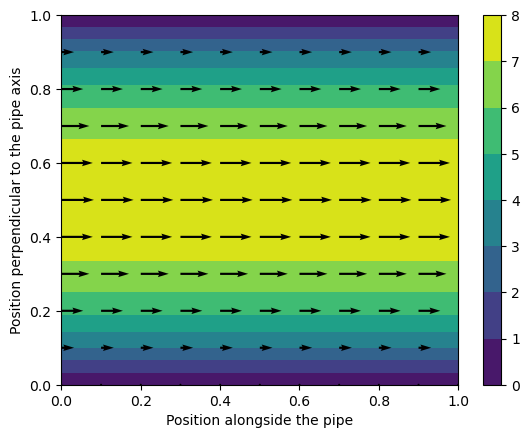

 46%|████▌     | 46/100 [00:06<00:07,  7.63it/s]

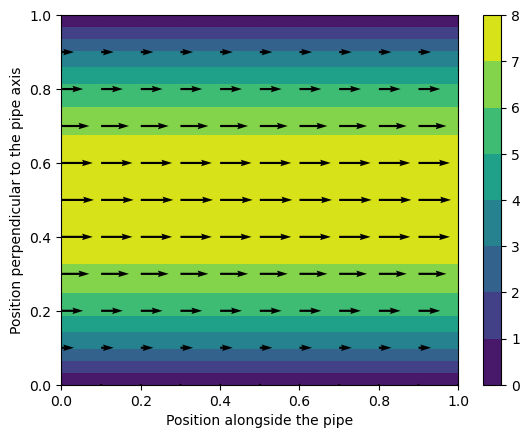

 47%|████▋     | 47/100 [00:06<00:06,  7.70it/s]

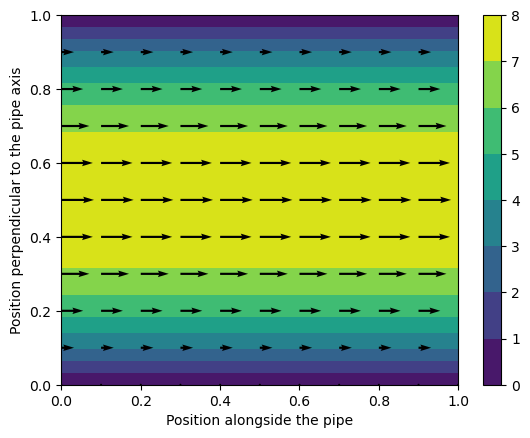

 48%|████▊     | 48/100 [00:06<00:06,  7.84it/s]

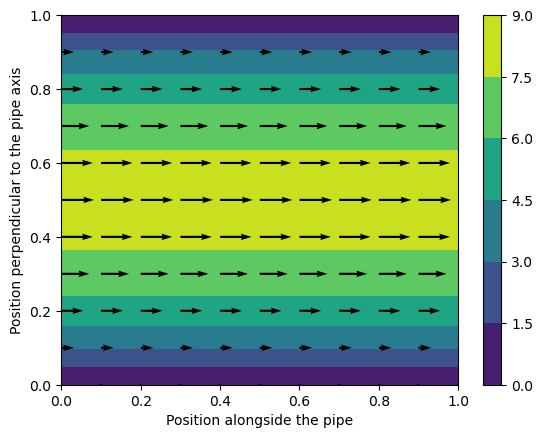

 49%|████▉     | 49/100 [00:06<00:06,  7.93it/s]

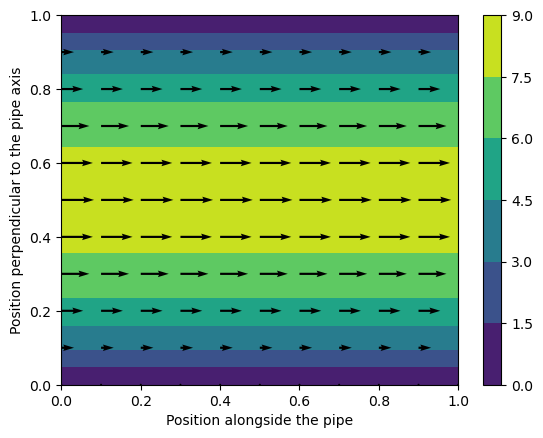

 50%|█████     | 50/100 [00:06<00:06,  7.97it/s]

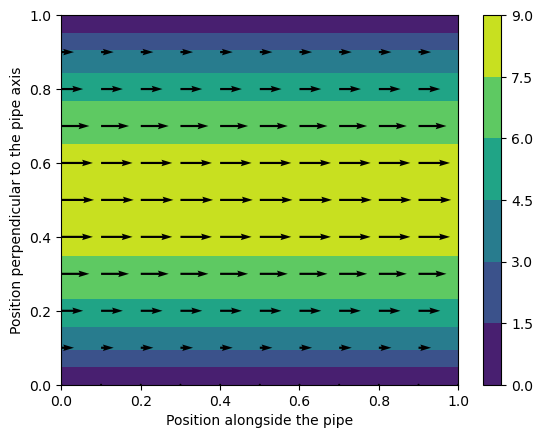

 51%|█████     | 51/100 [00:06<00:06,  7.99it/s]

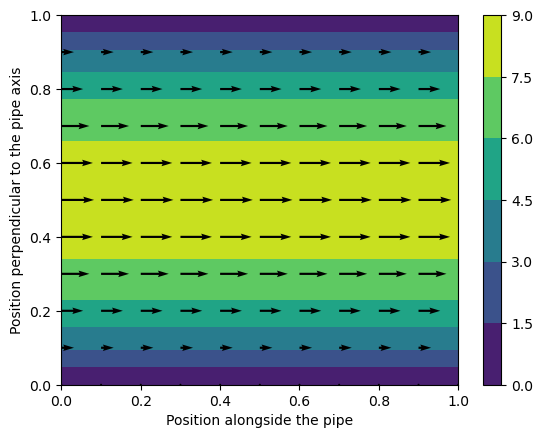

 52%|█████▏    | 52/100 [00:06<00:05,  8.04it/s]

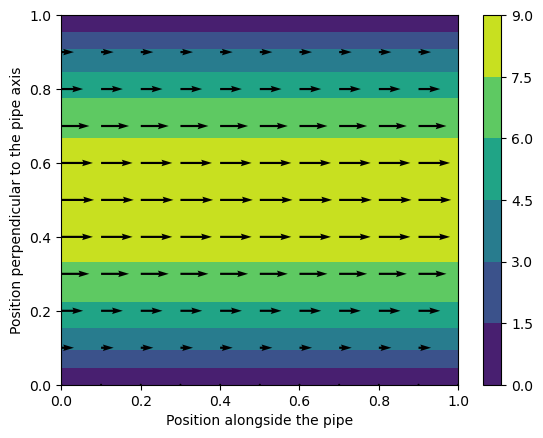

 53%|█████▎    | 53/100 [00:06<00:05,  8.12it/s]

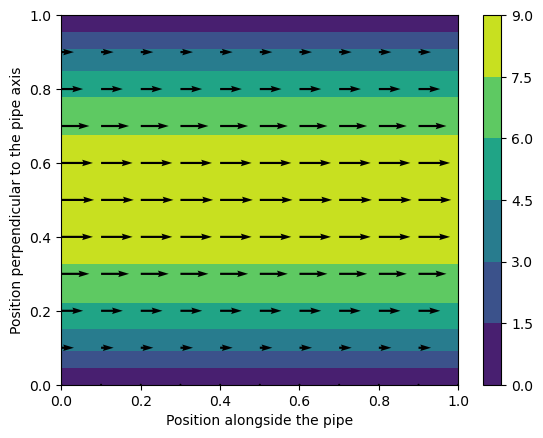

 54%|█████▍    | 54/100 [00:06<00:05,  8.05it/s]

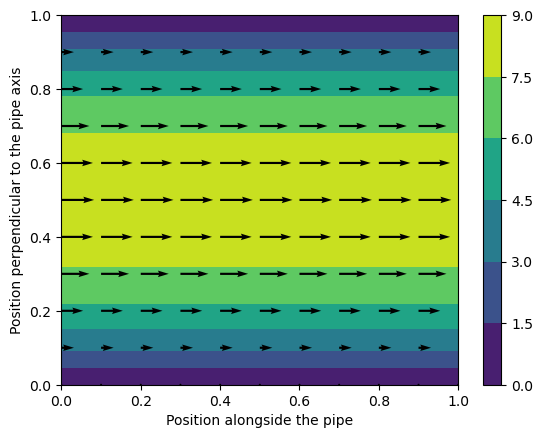

 55%|█████▌    | 55/100 [00:07<00:05,  8.07it/s]

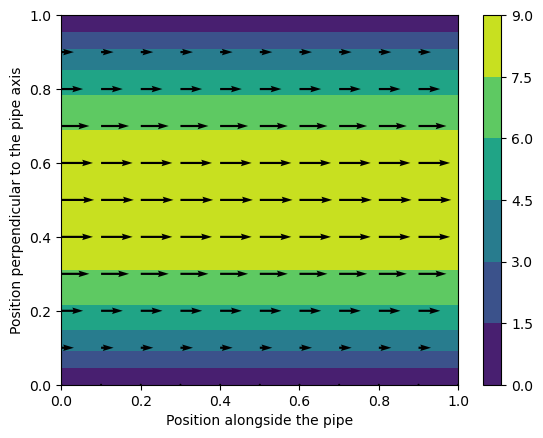

 56%|█████▌    | 56/100 [00:07<00:05,  8.10it/s]

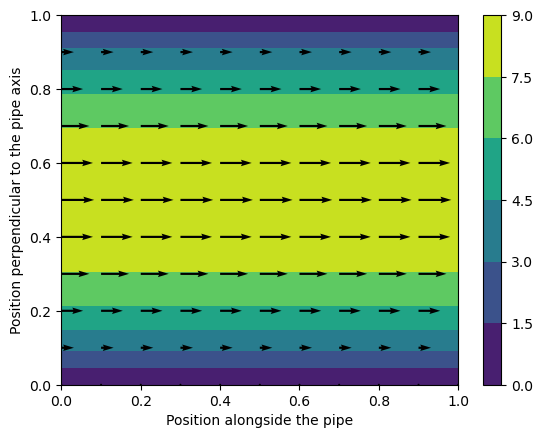

 57%|█████▋    | 57/100 [00:07<00:05,  8.14it/s]

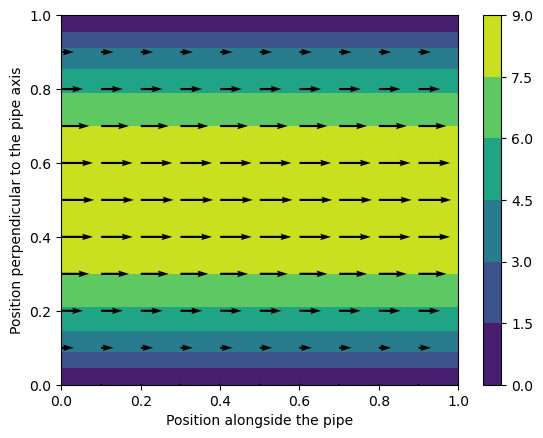

 58%|█████▊    | 58/100 [00:07<00:05,  7.40it/s]

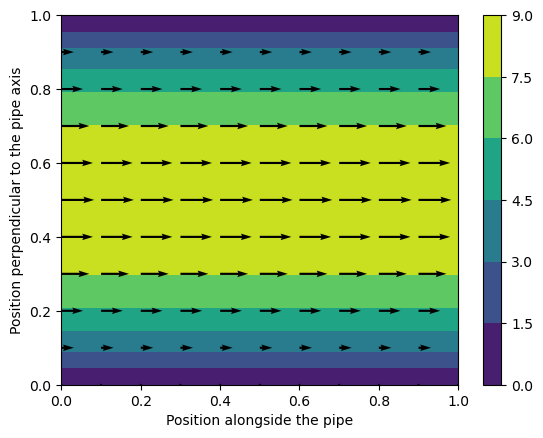

 59%|█████▉    | 59/100 [00:07<00:05,  7.58it/s]

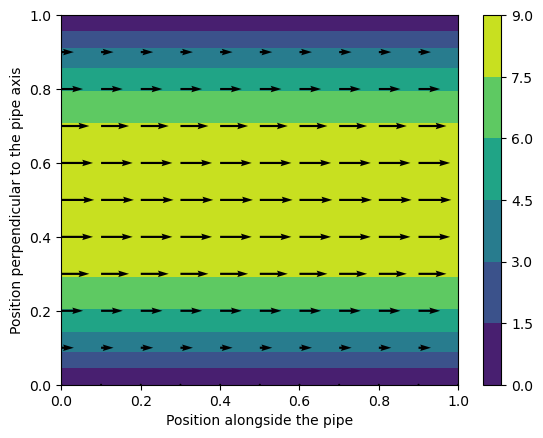

 60%|██████    | 60/100 [00:07<00:05,  7.76it/s]

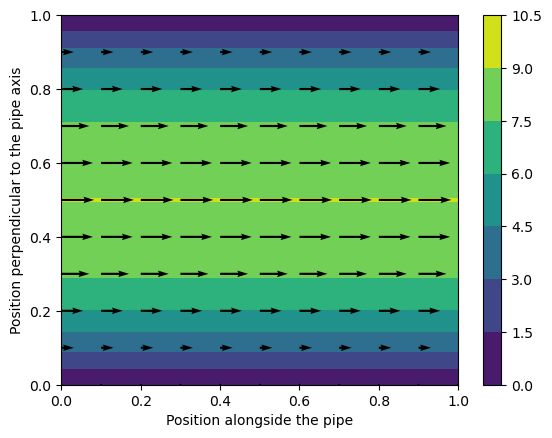

 61%|██████    | 61/100 [00:07<00:04,  7.84it/s]

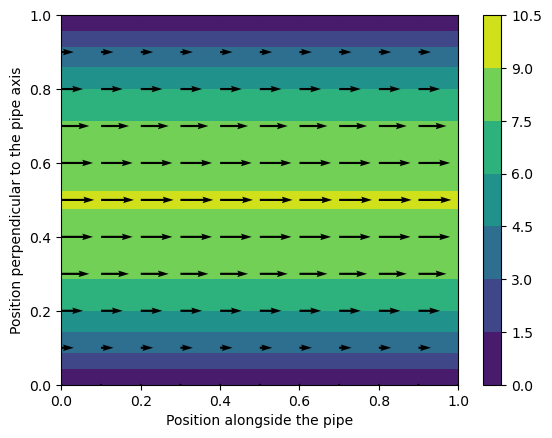

 62%|██████▏   | 62/100 [00:08<00:04,  7.94it/s]

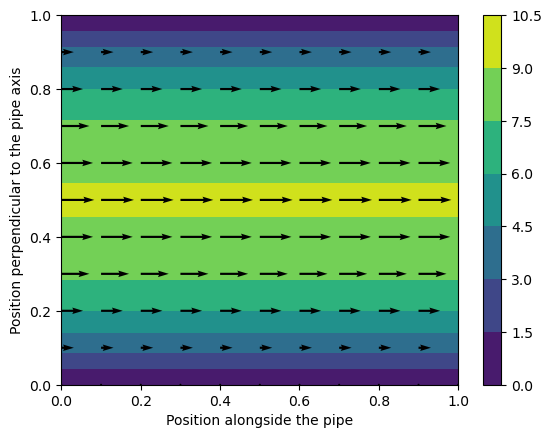

 63%|██████▎   | 63/100 [00:08<00:04,  7.69it/s]

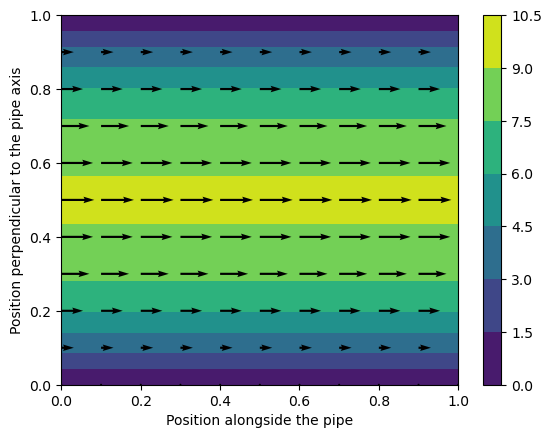

 64%|██████▍   | 64/100 [00:08<00:04,  7.74it/s]

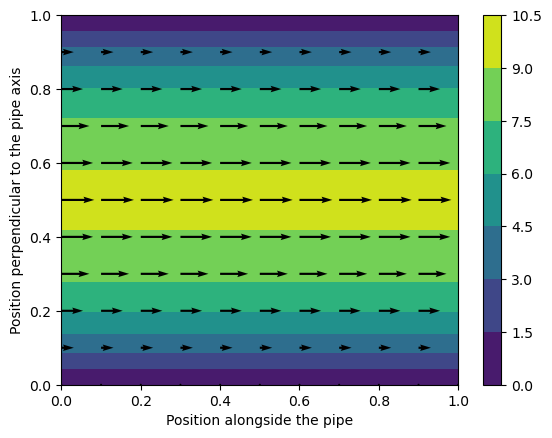

 65%|██████▌   | 65/100 [00:08<00:04,  7.82it/s]

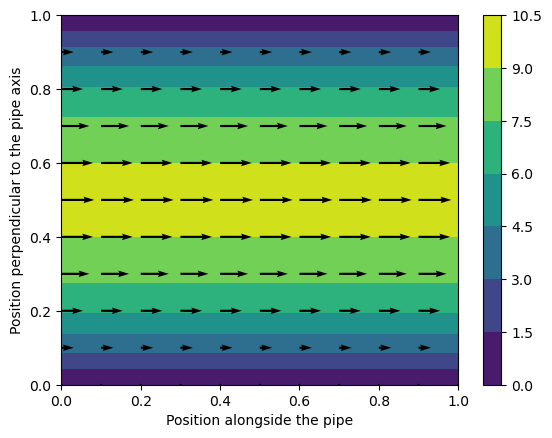

 66%|██████▌   | 66/100 [00:08<00:04,  7.76it/s]

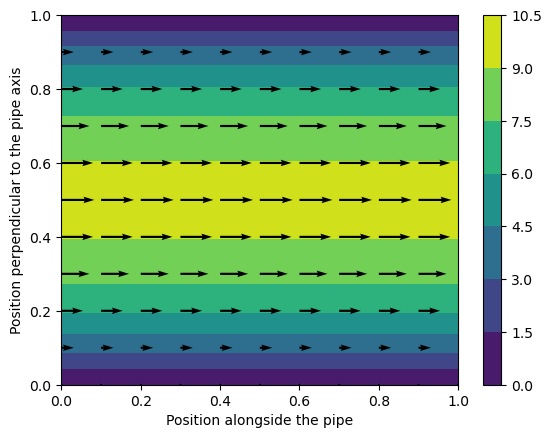

 67%|██████▋   | 67/100 [00:08<00:04,  7.87it/s]

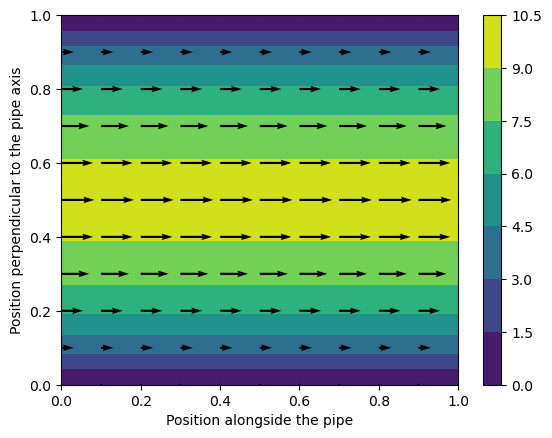

 68%|██████▊   | 68/100 [00:08<00:04,  7.65it/s]

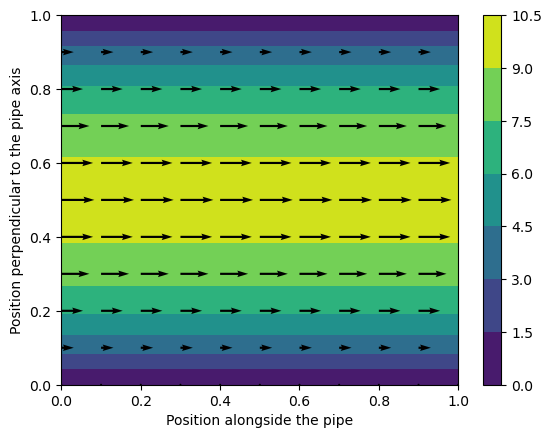

 69%|██████▉   | 69/100 [00:08<00:04,  7.74it/s]

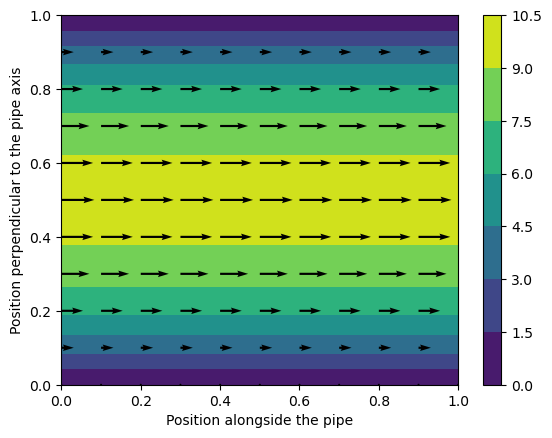

 70%|███████   | 70/100 [00:09<00:03,  7.78it/s]

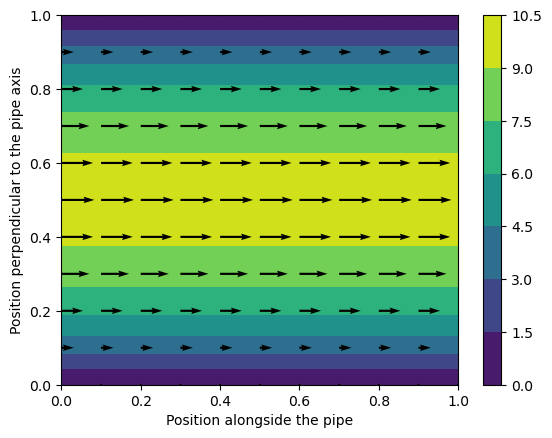

 71%|███████   | 71/100 [00:09<00:04,  7.09it/s]

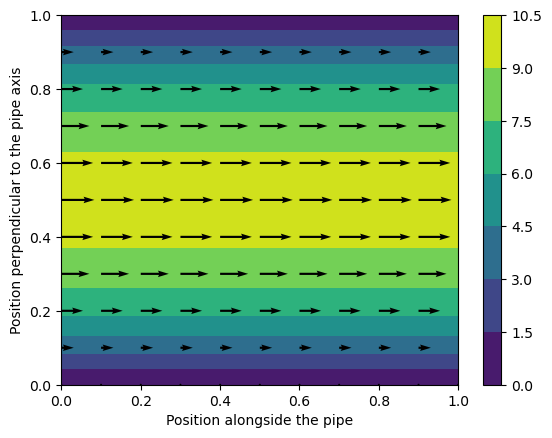

 72%|███████▏  | 72/100 [00:09<00:03,  7.32it/s]

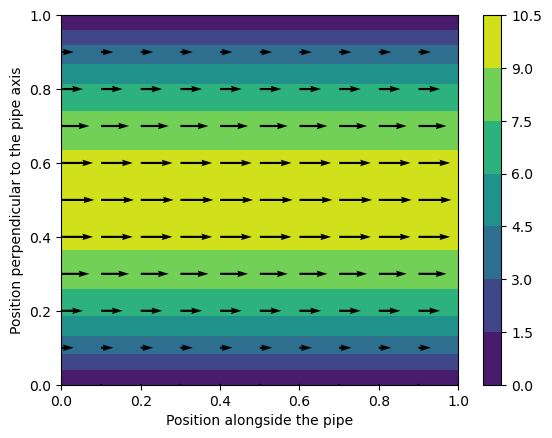

 73%|███████▎  | 73/100 [00:09<00:03,  7.50it/s]

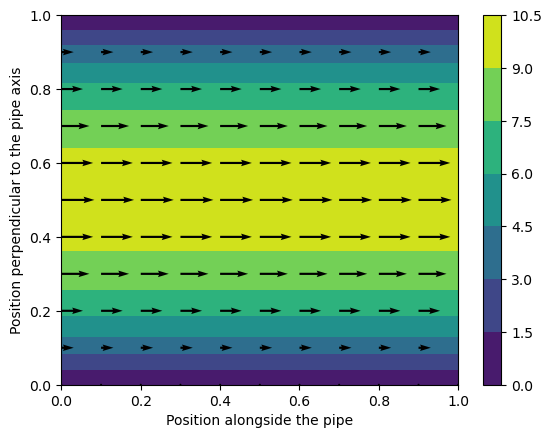

 74%|███████▍  | 74/100 [00:09<00:03,  7.47it/s]

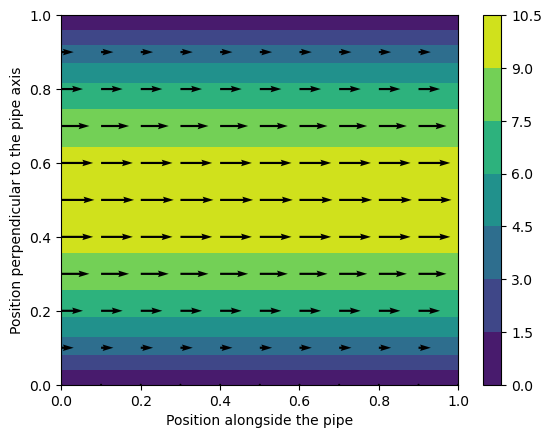

 75%|███████▌  | 75/100 [00:09<00:03,  7.65it/s]

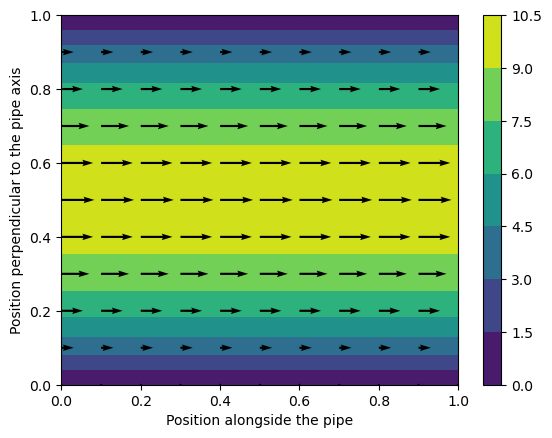

 76%|███████▌  | 76/100 [00:09<00:03,  7.75it/s]

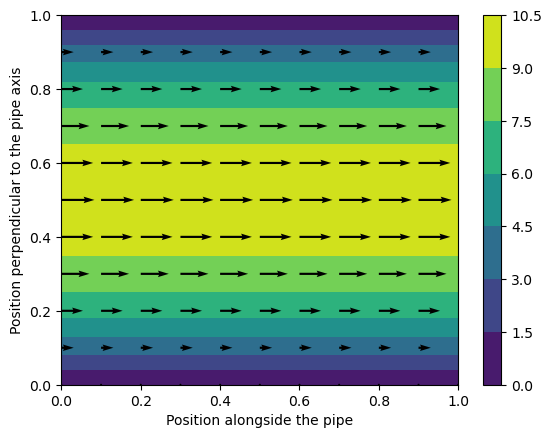

 77%|███████▋  | 77/100 [00:09<00:03,  7.65it/s]

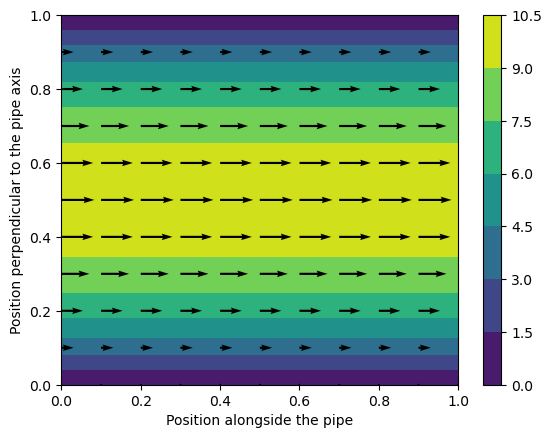

 78%|███████▊  | 78/100 [00:10<00:02,  7.77it/s]

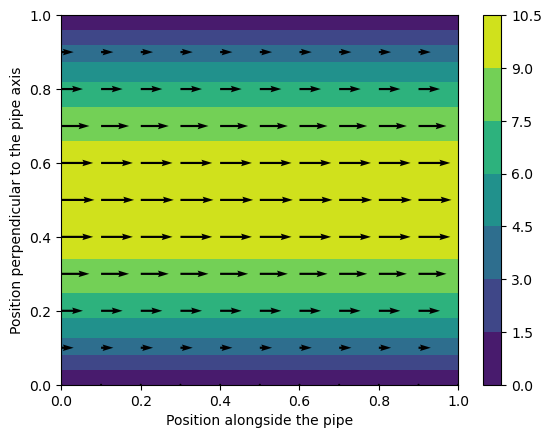

 79%|███████▉  | 79/100 [00:10<00:02,  7.87it/s]

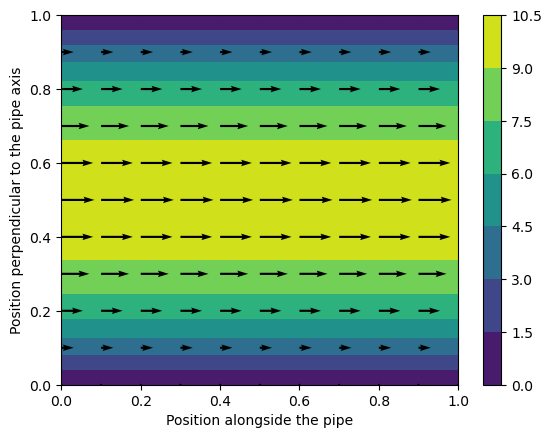

 80%|████████  | 80/100 [00:10<00:02,  7.71it/s]

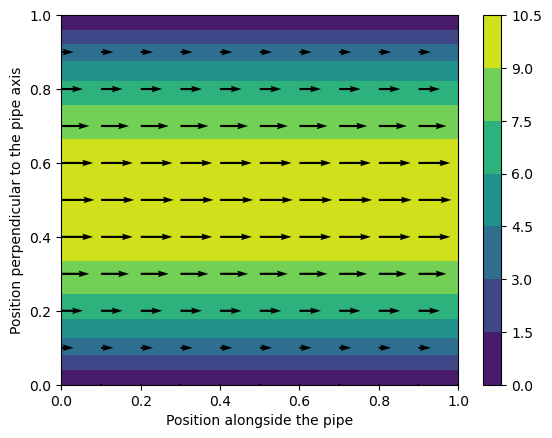

 81%|████████  | 81/100 [00:10<00:02,  7.76it/s]

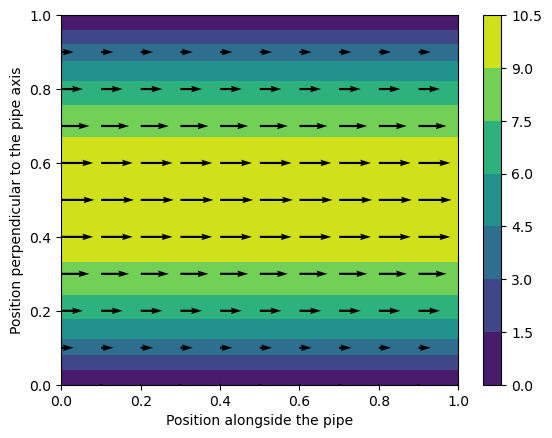

 82%|████████▏ | 82/100 [00:10<00:02,  7.87it/s]

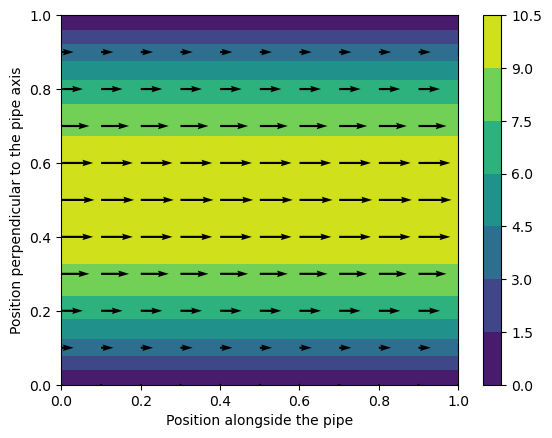

 83%|████████▎ | 83/100 [00:10<00:02,  7.78it/s]

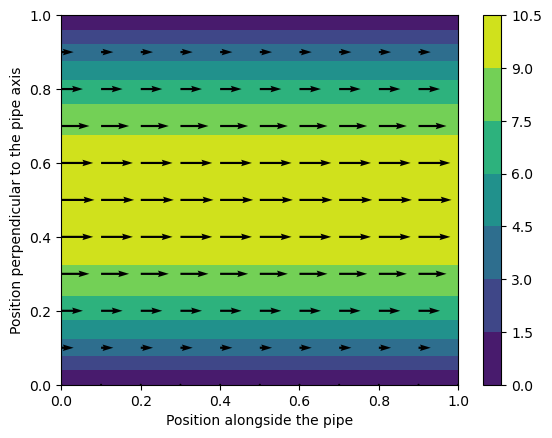

 84%|████████▍ | 84/100 [00:10<00:02,  7.91it/s]

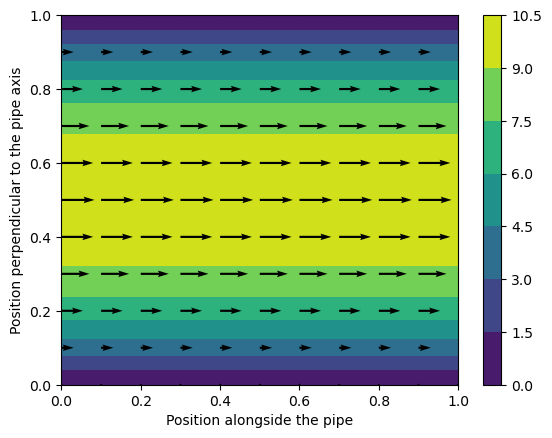

 85%|████████▌ | 85/100 [00:11<00:02,  7.18it/s]

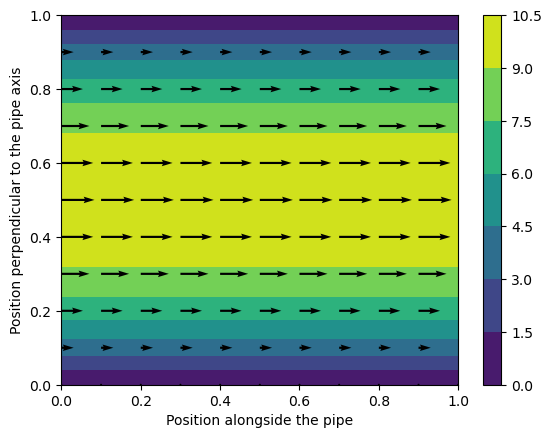

 86%|████████▌ | 86/100 [00:11<00:01,  7.21it/s]

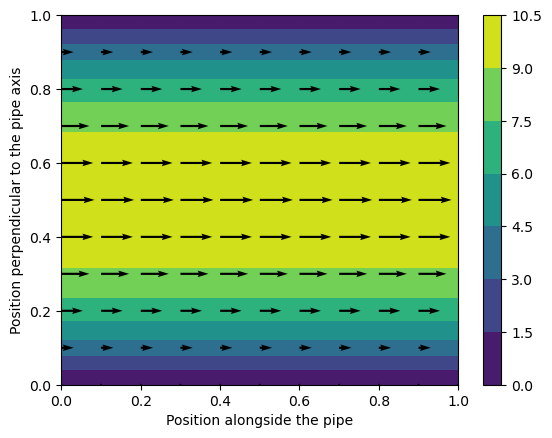

 87%|████████▋ | 87/100 [00:11<00:01,  7.42it/s]

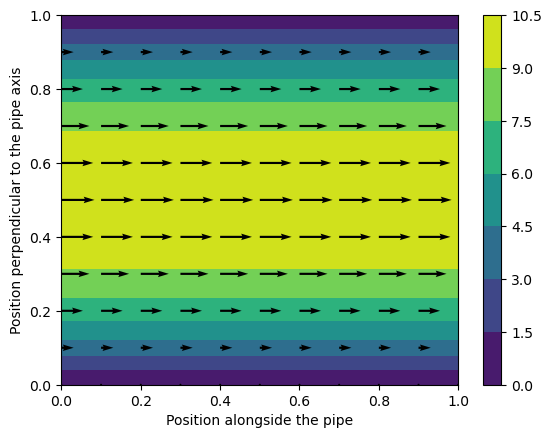

 88%|████████▊ | 88/100 [00:11<00:01,  7.58it/s]

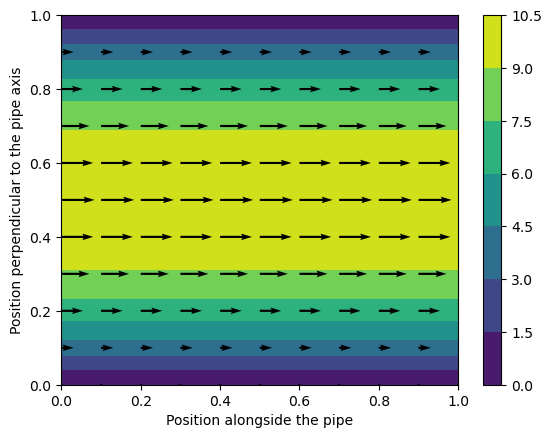

 89%|████████▉ | 89/100 [00:11<00:01,  7.40it/s]

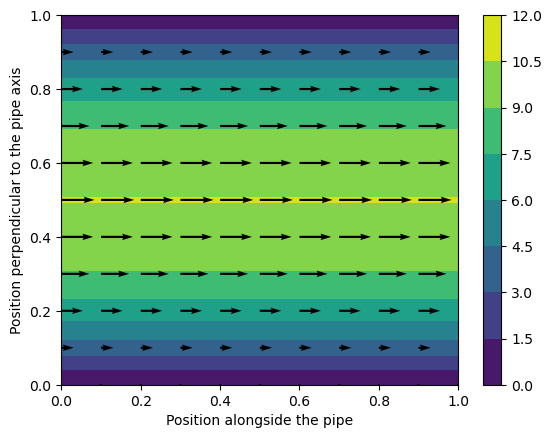

 90%|█████████ | 90/100 [00:11<00:01,  7.55it/s]

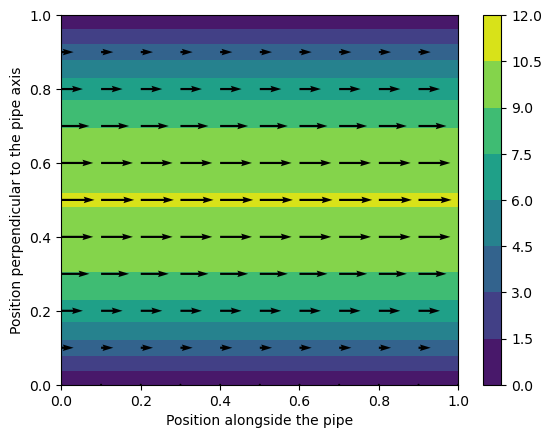

 91%|█████████ | 91/100 [00:11<00:01,  7.72it/s]

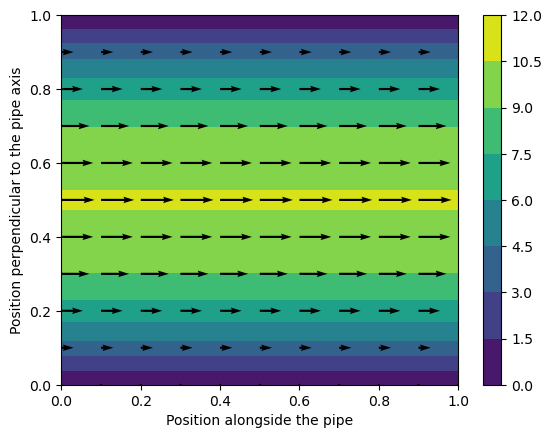

 92%|█████████▏| 92/100 [00:11<00:01,  7.54it/s]

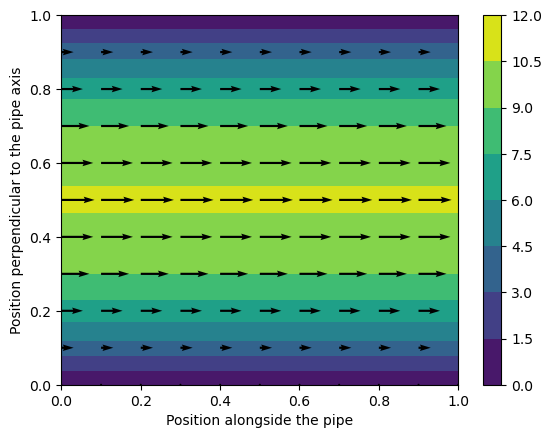

 93%|█████████▎| 93/100 [00:12<00:00,  7.65it/s]

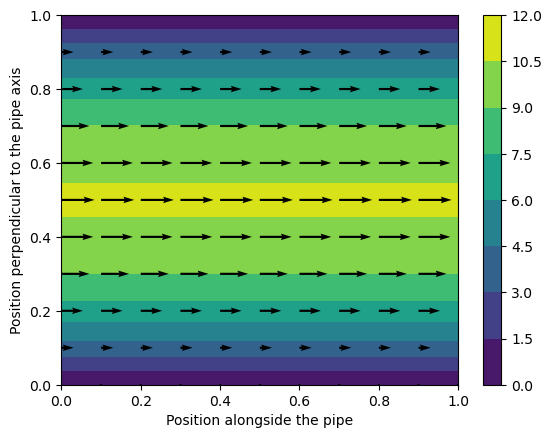

 94%|█████████▍| 94/100 [00:12<00:00,  7.75it/s]

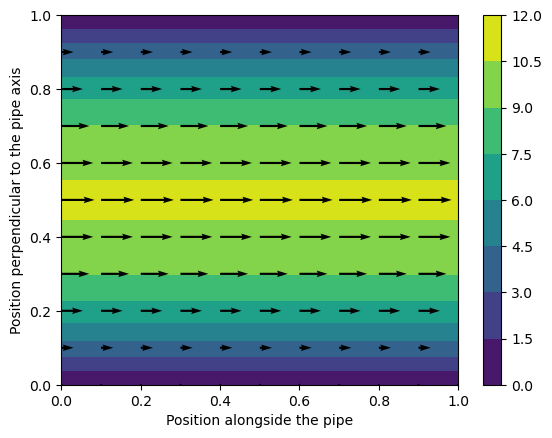

 95%|█████████▌| 95/100 [00:12<00:00,  7.52it/s]

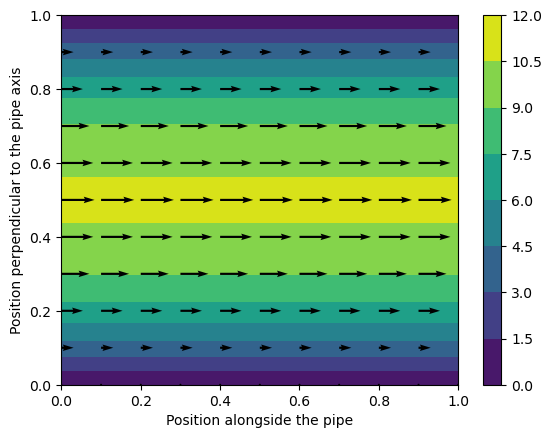

 96%|█████████▌| 96/100 [00:12<00:00,  7.61it/s]

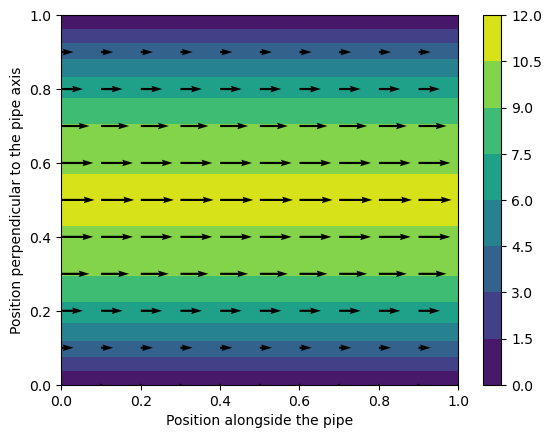

 97%|█████████▋| 97/100 [00:12<00:00,  7.71it/s]

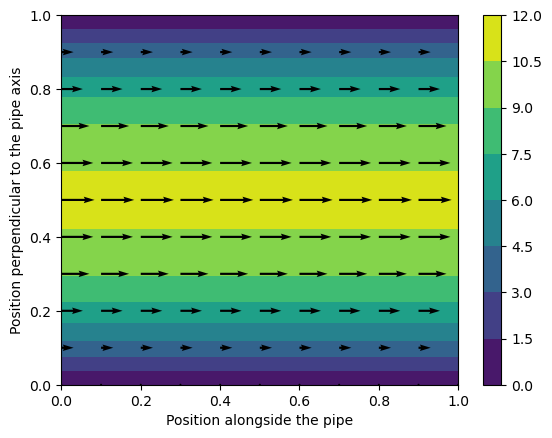

 98%|█████████▊| 98/100 [00:12<00:00,  7.52it/s]

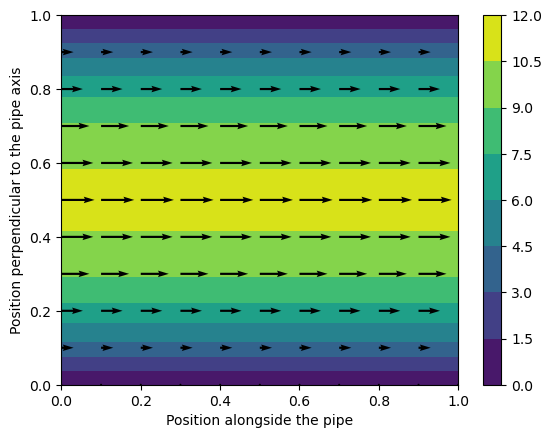

 99%|█████████▉| 99/100 [00:12<00:00,  6.92it/s]

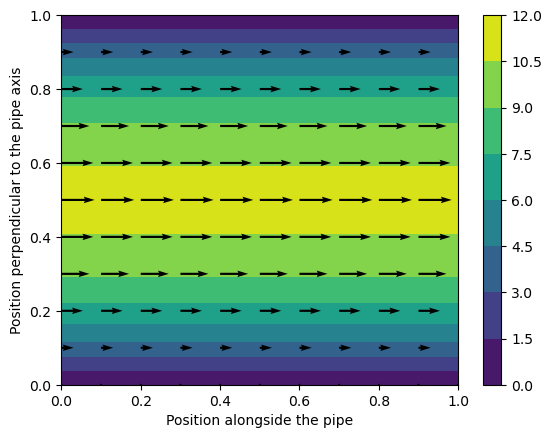

100%|██████████| 100/100 [00:13<00:00,  7.66it/s]


<Figure size 640x480 with 0 Axes>

In [9]:
# Initial conditions
velocity_x_prev = np.ones((N_POINTS, N_POINTS))
# the bottom edge
velocity_x_prev[0, :] = 0
velocity_x_prev[-1, :] = 0

# main loop
for iter in tqdm(range(N_TIME_STEPS)):
    convection_x = velocity_x_prev * central_different_x_periodic(velocity_x_prev)
    diffusion_x = KINEMATIC_VISCOUSITY * laplace_periodic(velocity_x_prev)  
    
    velocity_x_next = (
        velocity_x_prev
        +
        TIME_STEP_LENGTH
        *(
            -PRESSURE_GRADIENT[0]
            +
            diffusion_x
            -
            convection_x
        )
    )

    velocity_x_next[0, :] = 0.0
    velocity_x_next[-1, :]  = 0.0

    # Advance in time
    velocity_x_prev = velocity_x_next

    # Rendering
    plt.contourf(coordinates_x, coordinates_y, velocity_x_prev, level = 50)
    #  Show the color of each velocity
    plt.colorbar()
    # Vector plot
    plt.quiver(coordinates_x, coordinates_y, velocity_x_next, np.zeros_like(velocity_x_next))
    plt.xlabel("Position alongside the pipe")
    plt.ylabel("Position perpendicular to the pipe axis")

    plt.draw()
    plt.pause(0.05)
    # clear the plot
    plt.clf()
    
    

